# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress




# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | brae
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | olafsvik
Processing Record 7 of Set 1 | nantucket
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | pathalgaon
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | lodja
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | frankfort
Processing Record 19 of Set 1 | kloulklubed
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 |

Processing Record 41 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 4 | mantua
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | arman
Processing Record 46 of Set 4 | guipavas
Processing Record 47 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | turayf
Processing Record 0 of Set 5 | igrim
Processing Record 1 of Set 5 | flambouron
City not found. Skipping...
Processing Record 2 of Set 5 | abu zabad
Processing Record 3 of Set 5 | barrow
Processing Record 4 of Set 5 | conceicao do araguaia
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | anadyr
Processing Record 7 of Set 5 | pangody
Processing Record 8 of Set 5 | tabialan
City not found. Skipping...
Processing Record 9 of Set 5 | harper
Processing Record 10 of Set 5 | tuatapere
Processing Record 11 of Set 5 | nago
Processing Record 12 of Set 5 | san l

Processing Record 33 of Set 8 | paracuru
Processing Record 34 of Set 8 | adana
Processing Record 35 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 8 | mga
Processing Record 37 of Set 8 | pousat
City not found. Skipping...
Processing Record 38 of Set 8 | kathmandu
Processing Record 39 of Set 8 | privolzhskiy
Processing Record 40 of Set 8 | sorvag
City not found. Skipping...
Processing Record 41 of Set 8 | warqla
City not found. Skipping...
Processing Record 42 of Set 8 | magadan
Processing Record 43 of Set 8 | hay river
Processing Record 44 of Set 8 | broken hill
Processing Record 45 of Set 8 | abnub
Processing Record 46 of Set 8 | sao jose da coroa grande
Processing Record 47 of Set 8 | sao gabriel da cachoeira
Processing Record 48 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 49 of Set 8 | havelock
Processing Record 0 of Set 9 | griffith
Processing Record 1 of Set 9 | cacoal
Processing Record 2 of Set 9 | vestmannaeyjar
Processing Recor

Processing Record 15 of Set 12 | hovd
Processing Record 16 of Set 12 | abha
Processing Record 17 of Set 12 | porto belo
Processing Record 18 of Set 12 | kamenka
Processing Record 19 of Set 12 | mineiros
Processing Record 20 of Set 12 | kirakira
Processing Record 21 of Set 12 | kommunar
Processing Record 22 of Set 12 | tshikapa
Processing Record 23 of Set 12 | marsa matruh
Processing Record 24 of Set 12 | middle island
Processing Record 25 of Set 12 | donskoye
Processing Record 26 of Set 12 | maua
Processing Record 27 of Set 12 | umm durman
City not found. Skipping...
Processing Record 28 of Set 12 | aljezur
Processing Record 29 of Set 12 | khaniotis
Processing Record 30 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 12 | west plains
Processing Record 32 of Set 12 | ovalle
Processing Record 33 of Set 12 | bowen
Processing Record 34 of Set 12 | faya
Processing Record 35 of Set 12 | padang
Processing Record 36 of Set 12 | ardistan
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,-20.06,65,6,3.51,GL,1679325098
1,brae,60.3964,-1.3530,6.23,62,73,2.83,GB,1679325098
2,te anau,-45.4167,167.7167,7.53,94,100,2.24,NZ,1679325099
3,san patricio,28.0170,-97.5169,15.91,61,100,2.93,US,1679325099
4,olafsvik,64.8945,-23.7142,-0.06,72,90,5.63,IS,1679325099


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-20.06,65,6,3.51,GL,1679325098
1,brae,60.3964,-1.3530,6.23,62,73,2.83,GB,1679325098
2,te anau,-45.4167,167.7167,7.53,94,100,2.24,NZ,1679325099
3,san patricio,28.0170,-97.5169,15.91,61,100,2.93,US,1679325099
4,olafsvik,64.8945,-23.7142,-0.06,72,90,5.63,IS,1679325099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

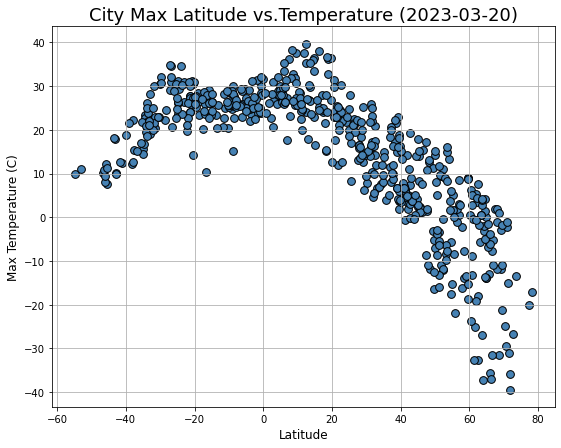

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x= "Lat", y="Max Temp", grid= True, figsize =(9,7), c ="steelblue", marker ="o", s=60, edgecolors='black')

# Incorporate the other graph properties
current_dateTime = datetime.now()
year = current_dateTime.year
month = current_dateTime.month
day = current_dateTime.day

plt.title((f"City Max Latitude vs.Temperature ({year}-0{month}-{day})"), fontsize=18)
plt.ylabel("Max Temperature (C)" , fontsize =12)
plt.xlabel("Latitude" , fontsize =12)

# Save the figure
plt.savefig('output_data/Fig1.png', bbox_inches='tight')

# Show plot
plt.show()


#### Latitude Vs. Humidity

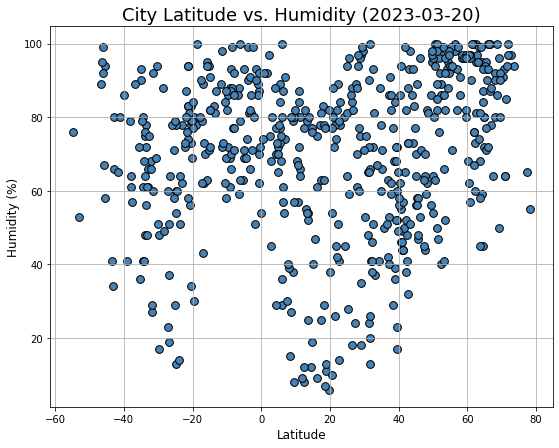

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x= "Lat", y="Humidity", grid= True, figsize =(9,7), c ="steelblue", marker ="o", s=60,edgecolors='black')

# Incorporate the other graph properties
current_dateTime = datetime.now()
year = current_dateTime.year
month = current_dateTime.month
day = current_dateTime.day

plt.title((f"City Latitude vs. Humidity ({year}-0{month}-{day})"), fontsize=18)
plt.ylabel("Humidity (%)" , fontsize =12)
plt.xlabel("Latitude" , fontsize =12)

# Save the figure
plt.savefig("output_data/Fig2.png", bbox_inches='tight')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

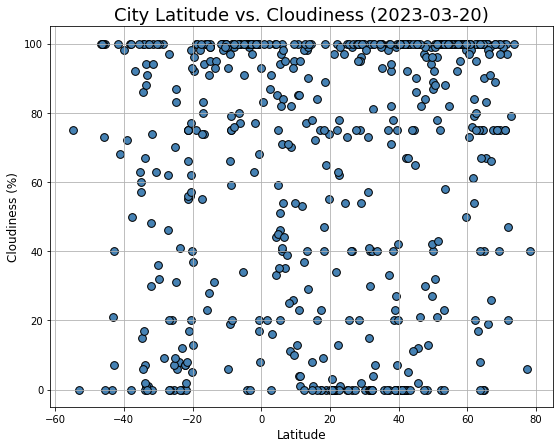

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x= "Lat", y="Cloudiness", grid= True, figsize =(9,7), c ="steelblue", marker ="o", s=60,edgecolors='black')

# Incorporate the other graph properties
current_dateTime = datetime.now()
year = current_dateTime.year
month = current_dateTime.month
day = current_dateTime.day

plt.title((f"City Latitude vs. Cloudiness ({year}-0{month}-{day})"), fontsize=18)
plt.ylabel("Cloudiness (%)" , fontsize =12)
plt.xlabel("Latitude" , fontsize =12)

# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches='tight')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

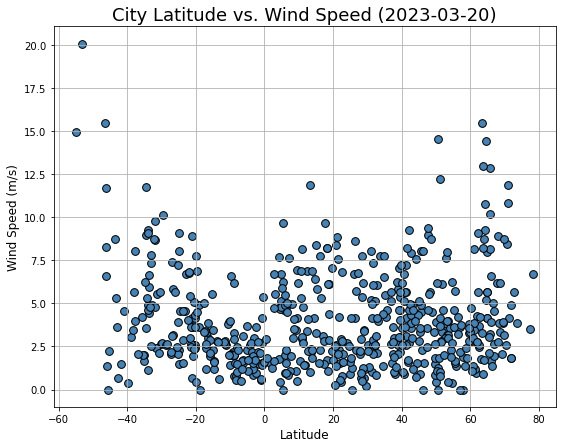

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x= "Lat", y="Wind Speed", grid= True, figsize =(9,7), c ="steelblue", marker ="o", s=60,edgecolors='black')

# Incorporate the other graph properties
current_dateTime = datetime.now()
year = current_dateTime.year
month = current_dateTime.month
day = current_dateTime.day


plt.title((f"City Latitude vs. Wind Speed ({year}-0{month}-{day})"), fontsize=18)
plt.ylabel("Wind Speed (m/s)" , fontsize =12)
plt.xlabel("Latitude" , fontsize =12)

# Save the figure
plt.savefig("output_data/Fig4.png", bbox_inches='tight')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def Linearregressionplots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    xq= np.percentile(x_values, [0.1])
    yq= np.percentile(y_values, [0.85])
    plt.figure(figsize=(9,7))
    plt.scatter(x_values,y_values, s=60)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(xq,yq), fontsize=25, color="red")
    print(f"The r-squared is: {rvalue**2}")
          
  

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaanaaq,77.4840,-69.3632,-20.06,65,6,3.51,GL,1679325098
1,brae,60.3964,-1.3530,6.23,62,73,2.83,GB,1679325098
3,san patricio,28.0170,-97.5169,15.91,61,100,2.93,US,1679325099
4,olafsvik,64.8945,-23.7142,-0.06,72,90,5.63,IS,1679325099
5,nantucket,41.2835,-70.0995,6.08,49,0,7.20,US,1679325100


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= pd.DataFrame(city_data_df.loc[city_data_df["Lat"] <0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,te anau,-45.4167,167.7167,7.53,94,100,2.24,NZ,1679325099
6,atuona,-9.8000,-139.0333,26.51,72,6,6.56,PF,1679325100
8,rikitea,-23.1203,-134.9692,26.26,78,12,4.53,PF,1679325101
9,puerto ayora,-0.7393,-90.3518,29.98,87,17,2.68,EC,1679325014
10,lodja,-3.4833,23.4333,23.53,81,99,0.82,CD,1679325101


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7316338637210517


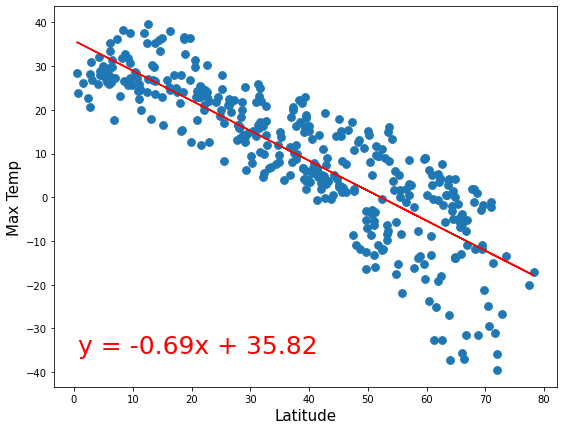

In [26]:
# Linear regression on Northern Hemisphere
Linearregressionplots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Max Temp', fontsize =15)
plt.show()


The r-squared is: 0.3368649611123348


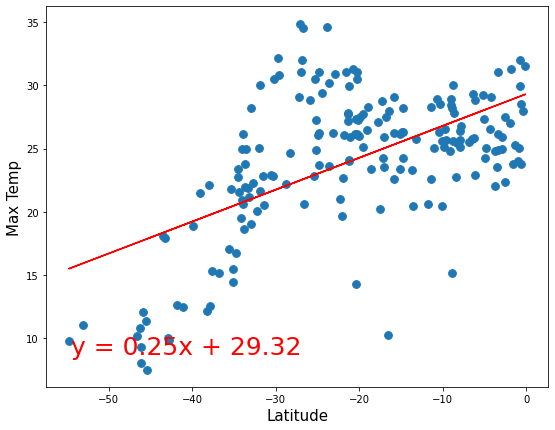

In [27]:
# Linear regression on Southern Hemisphere
Linearregressionplots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Max Temp', fontsize =15)
plt.show()

**Discussion about the linear relationship:** There is a strong postive correlation between latitude and max temperature for northern hemisphere however, there is a weak positive correlation between latitude and max temperature for southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1372318574255894


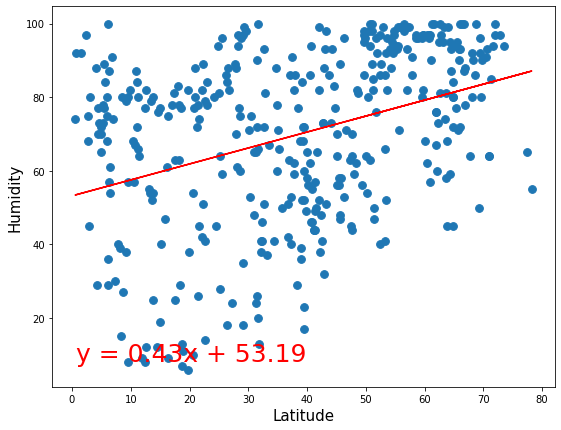

In [28]:
# Northern Hemisphere
Linearregressionplots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Humidity', fontsize =15)
plt.show()

The r-squared is: 0.08046867453687559


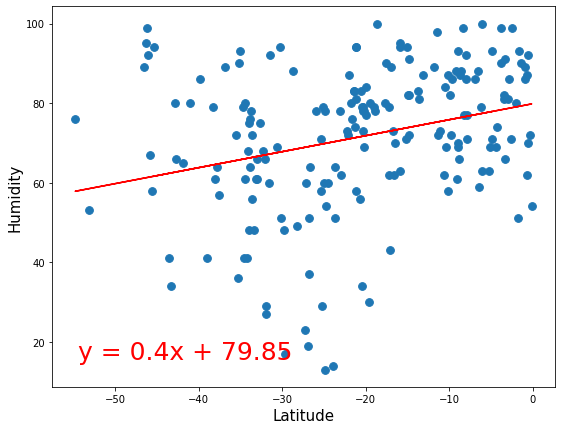

In [29]:
# Southern Hemisphere
Linearregressionplots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Humidity', fontsize =15)
plt.show()

**Discussion about the linear relationship:** There is very weak positive correlation between latitude and humidity for northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05544638724292392


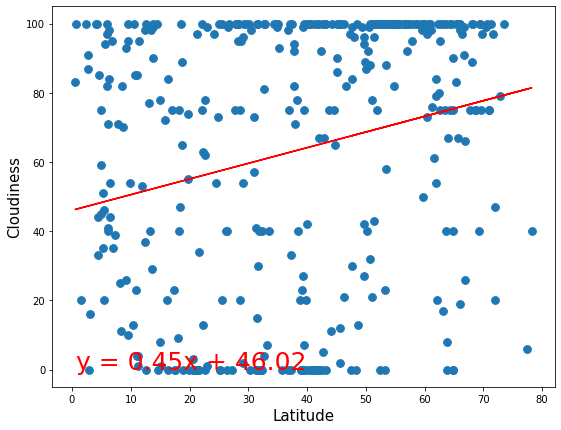

In [30]:
# Northern Hemisphere
Linearregressionplots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Cloudiness', fontsize =15)
plt.show()

The r-squared is: 0.06940431992110396


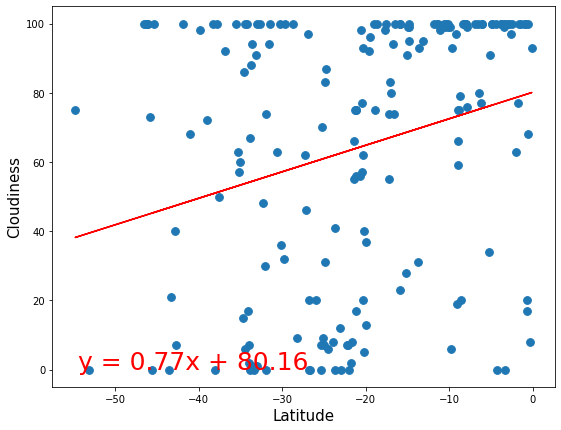

In [31]:
# Southern Hemisphere
Linearregressionplots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Cloudiness', fontsize =15)
plt.show()

**Discussion about the linear relationship:** There is very weak positive correlation between latitude and cloudiness for northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.011675696652773319


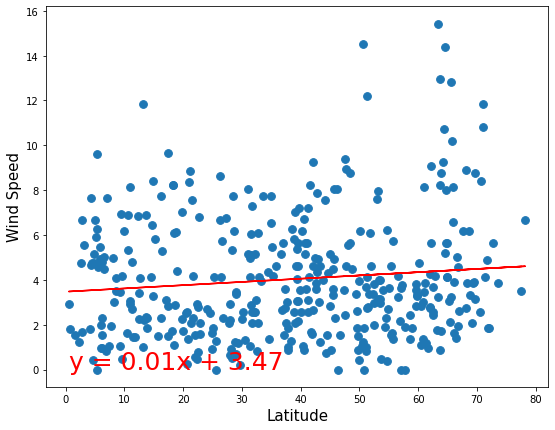

In [32]:
# Northern Hemisphere
Linearregressionplots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Wind Speed', fontsize =15)
plt.show()

The r-squared is: 0.2678661581786611


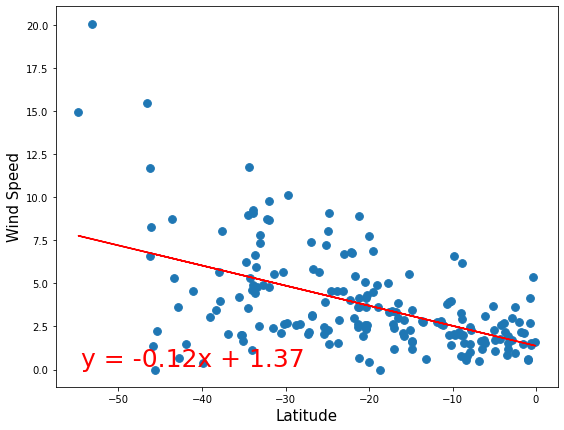

In [33]:
# Southern Hemisphere

Linearregressionplots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude', fontsize =15)
plt.ylabel('Wind Speed', fontsize =15)
plt.show()

**Discussion about the linear relationship:** There is very weak positive correlation between latitude and wind speed for northern and southern hemisphere.